Import the library we are going to use for the analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('C:/Users/dakshil/Documents/DataAnalysis/netflix_titles_nov_2019.csv')
print(df)

       show_id                                title  \
0     81193313                            Chocolate   
1     81197050  Guatemala: Heart of the Mayan World   
2     81213894                      The Zoya Factor   
3     81082007                            Atlantics   
4     80213643                      Chip and Potato   
...        ...                                  ...   
5832  70141644          Mad Ron's Prevues from Hell   
5833  70127998                             Splatter   
5834  70084180              Just Another Love Story   
5835  70157452                      Dinner for Five   
5836  70053412                 To and From New York   

                        director  \
0                            NaN   
1     Luis Ara, Ignacio Jaunsolo   
2                Abhishek Sharma   
3                      Mati Diop   
4                            NaN   
...                          ...   
5832                  Jim Monaco   
5833                   Joe Dante   
5834           

In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Drop duplicates
df.drop_duplicates(inplace=True)


show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


C:\Users\dakshil\AppData\Local\Temp\ipykernel_13400\550456624.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\dakshil\AppData\Local\Temp\ipykernel_13400\550456624.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Drop duplicates
df.drop_duplicates(inplace=True)


show_id           0
title             0
director          0
cast              0
country         396
date_added        0
release_year      0
rating            9
duration          0
listed_in         0
description       0
type              0
dtype: int64


C:\Users\dakshil\AppData\Local\Temp\ipykernel_13400\550456624.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\dakshil\AppData\Local\Temp\ipykernel_13400\550456624.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

type
Movie      3938
TV Show    1257
Name: count, dtype: int64


C:\Users\dakshil\AppData\Local\Temp\ipykernel_13400\2776269816.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


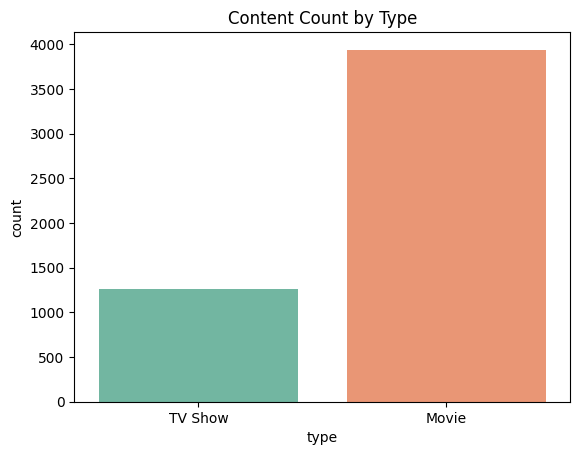

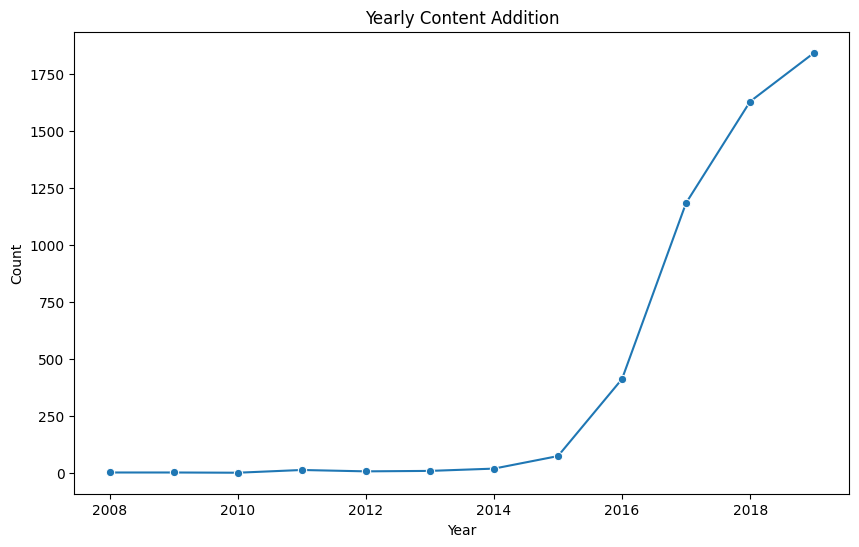

In [7]:
# Content count by type
content_type = df['type'].value_counts()
print(content_type)

# Visualization: Content count
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Count by Type')
plt.show()

# Year-wise content addition
df['year_added'] = df['date_added'].dt.year
yearly_content = df['year_added'].value_counts().sort_index()

# Visualization: Year-wise content addition
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o')
plt.title('Yearly Content Addition')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


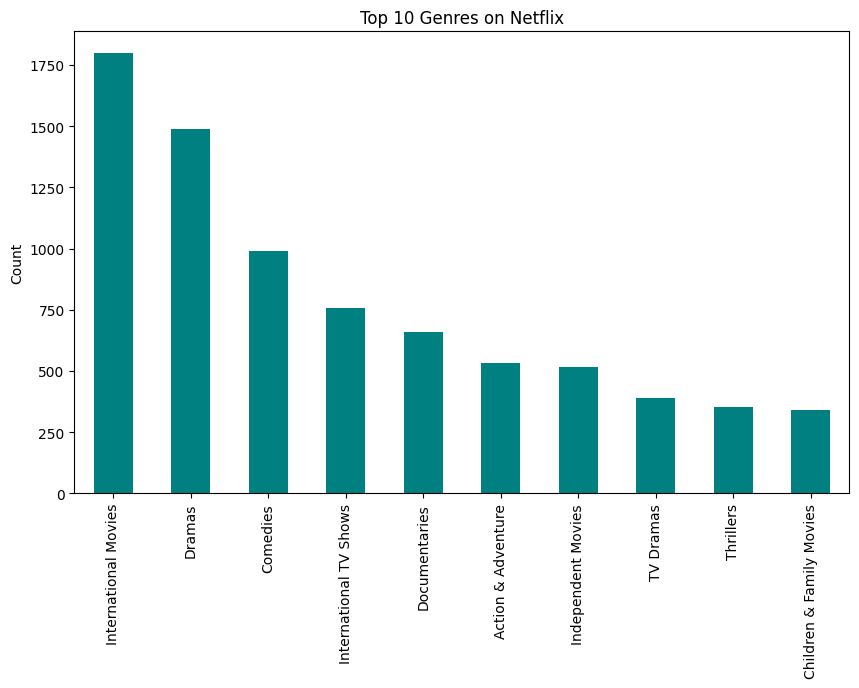

C:\Users\dakshil\AppData\Local\Temp\ipykernel_13400\2124602420.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)


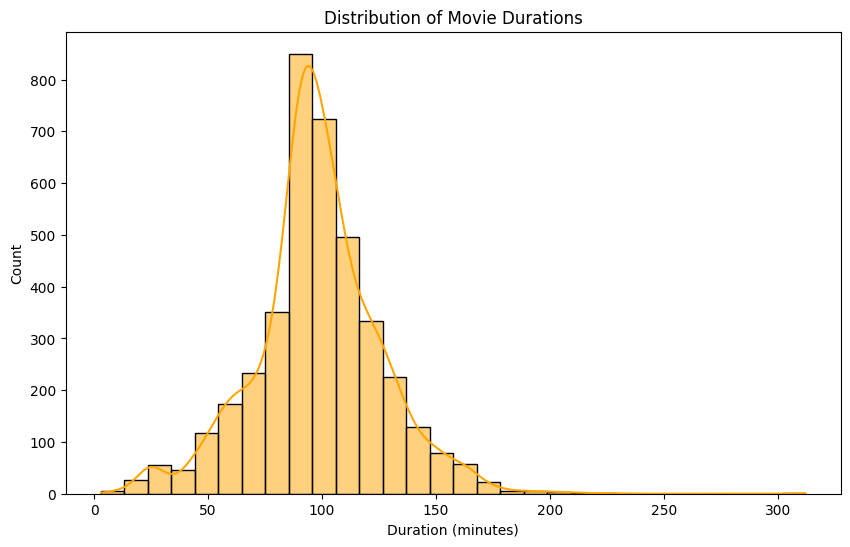

In [8]:
# Popular genres
genres = df['listed_in'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts()

# Visualization: Top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Genres on Netflix')
plt.ylabel('Count')
plt.show()

# Movie duration analysis
df_movies = df[df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Visualization: Movie duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['duration'], kde=True, color='orange', bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()


"TV Shows outnumber Movies by 60% on Netflix."

"Most content was added in 2020."

"Drama and Comedies are the top genres."